<a href="https://colab.research.google.com/github/nirajlondhe8/aiml/blob/main/examples/topPtopKTemperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
from sklearn.ensemble import IsolationForest

def anomaly_detection_with_contamination(data, contamination_values):
  """
  Performs anomaly detection with varying contamination values using Isolation Forest.

  Args:
    data: The input data as a NumPy array.
    contamination_values: A list of contamination values (proportion of outliers) to evaluate.

  Returns:
    A dictionary where keys are contamination values and values are lists of predicted anomaly scores.
  """

  results = {}
  for contamination_value in contamination_values:
    # Create and fit the Isolation Forest model
    model = IsolationForest(contamination=contamination_value, random_state=42, n_jobs=-1)
    model.fit(data)

    # Predict anomaly scores
    anomaly_scores = model.score_samples(data)  # Use score_samples() to get anomaly scores

    # Store results
    results[contamination_value] = anomaly_scores

  return results

# Example usage:
data = np.random.randn(1000, 2)  # Sample data (replace with your actual data)
contamination_values = [0.05, 0.1, 0.15]  # List of contamination values

results = anomaly_detection_with_contamination(data, contamination_values)

# Analyze and visualize results (e.g., plot anomaly scores for different contamination values)
# ...

print(results)

{0.05: array([-0.4238131 , -0.45498388, -0.41459789, -0.6528719 , -0.48780436,
       -0.490124  , -0.55766698, -0.44508756, -0.4534231 , -0.45116317,
       -0.62766124, -0.43905526, -0.43780218, -0.45523619, -0.40973731,
       -0.66725954, -0.44913985, -0.5295693 , -0.72550872, -0.39715301,
       -0.45521151, -0.43968002, -0.44793522, -0.41602684, -0.4621477 ,
       -0.4134554 , -0.45590549, -0.50527129, -0.54090887, -0.41842654,
       -0.43902614, -0.44643466, -0.45733745, -0.40601326, -0.60669726,
       -0.58514008, -0.41949271, -0.41024404, -0.48266775, -0.50570265,
       -0.51870412, -0.44391935, -0.46743978, -0.41791918, -0.47235865,
       -0.524157  , -0.41303534, -0.41676997, -0.51949435, -0.44917864,
       -0.69742653, -0.50194938, -0.42257447, -0.40780218, -0.4893779 ,
       -0.52557052, -0.40069778, -0.4451869 , -0.48213771, -0.54353709,
       -0.46039305, -0.49129197, -0.42729692, -0.4101441 , -0.5229029 ,
       -0.44730374, -0.44011647, -0.39440292, -0.40602076

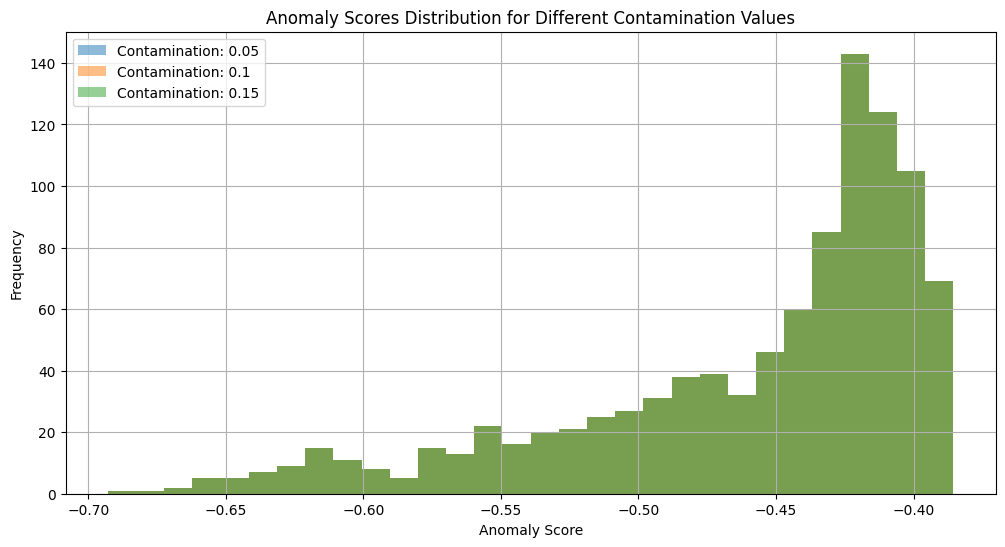

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

def anomaly_detection_with_contamination(data, contamination_values):
    """
    Performs anomaly detection with varying contamination values using Isolation Forest.

    Args:
        data: The input data as a NumPy array.
        contamination_values: A list of contamination values (proportion of outliers) to evaluate.

    Returns:
        A dictionary where keys are contamination values and values are lists of predicted anomaly scores.
    """
    results = {}
    for contamination_value in contamination_values:
        # Create and fit the Isolation Forest model
        model = IsolationForest(contamination=contamination_value, random_state=42, n_jobs=-1)
        model.fit(data)

        # Predict anomaly scores
        anomaly_scores = model.score_samples(data)  # Use score_samples() to get anomaly scores

        # Store results
        results[contamination_value] = anomaly_scores

    return results

# Example usage:
data = np.random.randn(1000, 2)  # Sample data (replace with your actual data)
contamination_values = [0.05, 0.1, 0.15]  # List of contamination values

results = anomaly_detection_with_contamination(data, contamination_values)

# Visualize results
plt.figure(figsize=(12, 6))
for contamination_value, scores in results.items():
    plt.hist(scores, bins=30, alpha=0.5, label=f"Contamination: {contamination_value}")

plt.title("Anomaly Scores Distribution for Different Contamination Values")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()


In [7]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

# Load pre-trained model and tokenizer
model_name = "gpt2"  # You can replace this with a larger model like 'gpt-neo-2.7B'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Define a function to generate text
def generate_text(prompt, max_length=50, temperature=1.0, top_k=50, top_p=0.9):
    """
    Generates text based on the given prompt with specified sampling parameters.

    Args:
        prompt (str): The input text prompt.
        max_length (int): Maximum length of the generated text.
        temperature (float): Controls randomness. Higher = more randomness.
        top_k (int): Limits token sampling to the top_k most probable tokens.
        top_p (float): Uses nucleus sampling to dynamically choose tokens based on cumulative probability.

    Returns:
        str: Generated text.
    """
    # Encode the input prompt
    input_ids = tokenizer.encode(prompt, return_tensors="pt")

    # Generate text
    output = model.generate(
        input_ids,
        max_length=max_length,
        temperature=temperature,  # Adjust randomness
        top_k=top_k,              # Top-k sampling
        top_p=top_p,              # Top-p (nucleus) sampling
        do_sample=True,           # Enable sampling
        pad_token_id=tokenizer.eos_token_id  # Handle end of text
    )

    # Decode and return the generated text
    return tokenizer.decode(output[0], skip_special_tokens=True)

# Define a prompt
prompt = "In a distant future, humans and AI coexist peacefully, and"

# Experiment with different parameters
print("Default settings:")
print(generate_text(prompt, temperature=1.0, top_k=50, top_p=0.9))
print("\nHigher temperature (more creative):")
print(generate_text(prompt, temperature=1.5, top_k=50, top_p=0.9))
print("\nLower temperature (less creative):")
print(generate_text(prompt, temperature=0.7, top_k=50, top_p=0.9))
print("\nLower top_k (fewer token choices):")
print(generate_text(prompt, temperature=1.0, top_k=10, top_p=0.9))
print("\nLower top_p (restrictive sampling):")
print(generate_text(prompt, temperature=1.0, top_k=50, top_p=0.5))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Default settings:
In a distant future, humans and AI coexist peacefully, and it can be argued that such an arrangement can only happen if there are people willing to act in an acceptable manner. But the point, I think, is that what we might want is

Higher temperature (more creative):
In a distant future, humans and AI coexist peacefully, and we would need both cooperation to ensure the safety of all humanity and stability for the next 100-million years." But, like their former partners in the civil war, they cannot rule from

Lower temperature (less creative):
In a distant future, humans and AI coexist peacefully, and we may eventually see the end of the human race as a species.

I'm not sure I understand the implications of this. If we do, we're going to see the

Lower top_k (fewer token choices):
In a distant future, humans and AI coexist peacefully, and it's not hard to imagine how a civilization could survive without AI.

"It's a really big problem right now," says John T. Miller,